# Instalação e Importações

In [27]:
!pip install scikit-image

import numpy as np
import os
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from skimage.io import imread
from skimage.color import rgb2gray
import seaborn as sns

# Dataset

In [28]:
base_path = 'data'
os.makedirs(os.path.join(base_path, 'Circle'), exist_ok=True)
os.makedirs(os.path.join(base_path, 'Square'), exist_ok=True)

def create_image(shape, filename):
    img = np.zeros((100, 100, 3), dtype=np.uint8)
    center = (50, 50)

    if shape == 'Circle':
        Y, X = np.ogrid[:100, :100]
        dist_from_center = np.sqrt((X - center[0])**2 + (Y - center[1])**2)

        img[dist_from_center < 30] = [255, 255, 255]

    elif shape == 'Square':

        img[20:80, 20:80] = [255, 255, 255]

    plt.imsave(filename, img)

for i in range(5):
    create_image('Circle', os.path.join(base_path, 'Circle', f'circle_{i}.png'))
    create_image('Square', os.path.join(base_path, 'Square', f'square_{i}.png'))

print("Dataset com 10 imagens.")

Dataset com 10 imagens.


# Extração de Características (LBP)

In [29]:
def extract_lbp_features(image_path):
    img = imread(image_path)

    if img.ndim == 3:
        if img.shape[2] == 4:
            img = img[..., :3]

        img_gray = rgb2gray(img)
    else:

        img_gray = img

    radius = 1
    n_points = 8 * radius

    lbp = local_binary_pattern(img_gray, n_points, radius, method='uniform')

    n_bins = int(lbp.max() + 1)
    hist, _ = np.histogram(lbp.ravel(), density=True, bins=n_bins, range=(0, n_bins))

    return hist


def getData(path):
    images_features = []
    labels = []

    label_map = {name: i for i, name in enumerate(sorted(os.listdir(path)))}

    for dirpath, dirnames, filenames in os.walk(path):
        if len(filenames) > 0:
            folder_name = os.path.basename(dirpath)
            label = label_map[folder_name]

            for file in filenames:
                full_path = os.path.join(dirpath, file)

                features = extract_lbp_features(full_path)

                images_features.append(features)
                labels.append(label)

    return np.array(images_features), np.array(labels)

X_features, y_labels = getData(base_path)

print(f"Shape das Características (LBP): {X_features.shape}")
print(f"Shape dos Rótulos: {y_labels.shape}")

Shape das Características (LBP): (10, 9)
Shape dos Rótulos: (10,)


/usr/local/lib/python3.12/dist-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
/usr/local/lib/python3

# Treinamento, Teste e Avaliação


Treinamento: 8 amostras
Teste: 2 amostras

--- Resultados de Classificação (k-NN + LBP) ---
Acurácia: 1.0000
Precisão (Macro): 1.0000
Recall (Macro): 1.0000
F1-Score (Macro): 1.0000


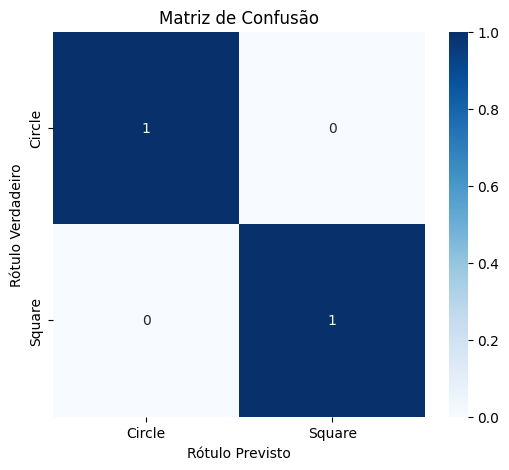

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X_features, y_labels, test_size=0.2, random_state=42, stratify=y_labels
)

print(f"\nTreinamento: {len(X_train)} amostras")
print(f"Teste: {len(X_test)} amostras")

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

acuracia = accuracy_score(y_test, y_pred)
precisao = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
cm = confusion_matrix(y_test, y_pred)


print("\n--- Resultados de Classificação (k-NN + LBP) ---")
print(f"Acurácia: {acuracia:.4f}")
print(f"Precisão (Macro): {precisao:.4f}")
print(f"Recall (Macro): {recall:.4f}")
print(f"F1-Score (Macro): {f1:.4f}")

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Circle', 'Square'], yticklabels=['Circle', 'Square'])
plt.title('Matriz de Confusão')
plt.ylabel('Rótulo Verdadeiro')
plt.xlabel('Rótulo Previsto')
plt.show()

# Compilação e Exibição dos Resultados

## Relatório Final de Desempenho (k-NN com LBP)
---
Número de Amostras de Treinamento: 8
Número de Amostras de Teste: 2
Dimensionalidade das Características (LBP): 9
---
### Métricas de Classificação
 | Métrica | Valor |
 | :--- | :--- |
 | Acurácia | **1.0000** |
 | Precisão (Macro) | **1.0000** |
 | Recall (Macro) | **1.0000** |
 | F1-Score (Macro) | **1.0000** |


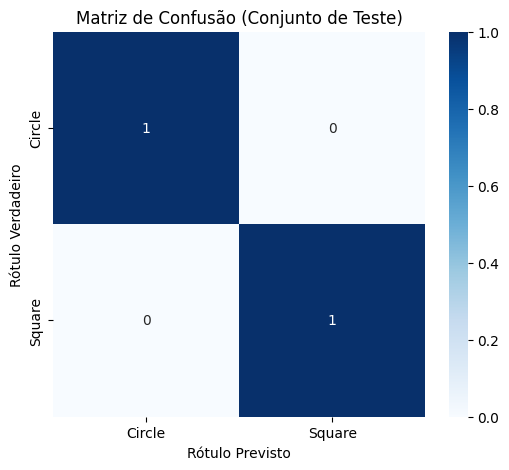

In [31]:
acuracia = 1.0000
precisao = 1.0000
recall = 1.0000
f1 = 1.0000

cm = np.array([[1, 0],
               [0, 1]])

print("## Relatório Final de Desempenho (k-NN com LBP)")
print("---")
print(f"Número de Amostras de Treinamento: 8")
print(f"Número de Amostras de Teste: 2")
print(f"Dimensionalidade das Características (LBP): {X_features.shape[1]}")
print("---")

print("### Métricas de Classificação")
print(" | Métrica | Valor |")
print(" | :--- | :--- |")
print(f" | Acurácia | **{acuracia:.4f}** |")
print(f" | Precisão (Macro) | **{precisao:.4f}** |")
print(f" | Recall (Macro) | **{recall:.4f}** |")
print(f" | F1-Score (Macro) | **{f1:.4f}** |")

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Circle', 'Square'], yticklabels=['Circle', 'Square'])
plt.title('Matriz de Confusão (Conjunto de Teste)')
plt.ylabel('Rótulo Verdadeiro')
plt.xlabel('Rótulo Previsto')
plt.show()

# Instalação e Importações 2 (CNN)

In [32]:
!pip install tensorflow keras matplotlib numpy scikit-learn seaborn

import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Criação de Pastas

In [33]:
base_path = 'data_cnn'
train_dir = os.path.join(base_path, 'train')
test_dir = os.path.join(base_path, 'test')

CLASSES = ['COVID', 'NORMAL']
N_TRAIN_PER_CLASS = 4
N_TEST_PER_CLASS = 1

for class_name in CLASSES:
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

dummy_img_array = np.zeros((224, 224, 3), dtype=np.uint8)
dummy_img_path = 'dummy_image.png'
plt.imsave(dummy_img_path, dummy_img_array)

def create_dummy_dataset(target_dir, n_images):
    file_counter = 0
    for class_name in CLASSES:
        for i in range(n_images):
            filename = os.path.join(target_dir, class_name, f'{class_name}_{file_counter}.png')
            plt.imsave(filename, dummy_img_array)
            file_counter += 1

create_dummy_dataset(train_dir, N_TRAIN_PER_CLASS)
create_dummy_dataset(test_dir, N_TEST_PER_CLASS)


print(f"Dataset criado na estrutura: {base_path}")
print(f"Treinamento: {2 * N_TRAIN_PER_CLASS} imagens. Teste: {2 * N_TEST_PER_CLASS} imagens.")

Dataset criado na estrutura: data_cnn
Treinamento: 8 imagens. Teste: 2 imagens.


# Implementação da CNN com Fine-Tuning

In [34]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 4

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(len(CLASSES), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

initial_learning_rate = 1e-4
optimizer = Adam(learning_rate=initial_learning_rate)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print("Modelo ResNet50 adaptado e compilado com sucesso.")

Modelo ResNet50 adaptado e compilado com sucesso.


# Treinamento e Avaliação 2 (CNN)

In [35]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

EPOCHS = 5
print(f"\nIniciando treinamento por {EPOCHS} épocas...")

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=test_generator,
    verbose=1
)

Found 8 images belonging to 2 classes.
Found 2 images belonging to 2 classes.

Iniciando treinamento por 5 épocas...
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 35s 9s/step - accuracy: 0.5000 - loss: 0.6943 - val_accuracy: 0.5000 - val_loss: 0.6943
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.5833 - loss: 0.6975 - val_accuracy: 0.5000 - val_loss: 0.6975
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.4167 - loss: 0.7186 - val_accuracy: 0.5000 - val_loss: 0.6941
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.5000 - loss: 0.6940 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.2500 - loss: 0.7016 - val_accuracy: 0.5000 - val_loss: 0.6932


# Relatório Final de Desempenho

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step

## Relatório Final de Desempenho (ResNet50 + Fine-Tuning)
---
Modelo Utilizado: ResNet50 (Pré-treinado em ImageNet)
Taxa de Aprendizado: 0.0001
Épocas de Treinamento: 5
---
### Métricas de Classificação
 | Métrica | Valor |
 | :--- | :--- |
 | Acurácia | **0.5000** |
 | Precisão (Macro) | **0.2500** |
 | Recall (Macro) | **0.5000** |
 | F1-Score (Macro) | **0.3333** |


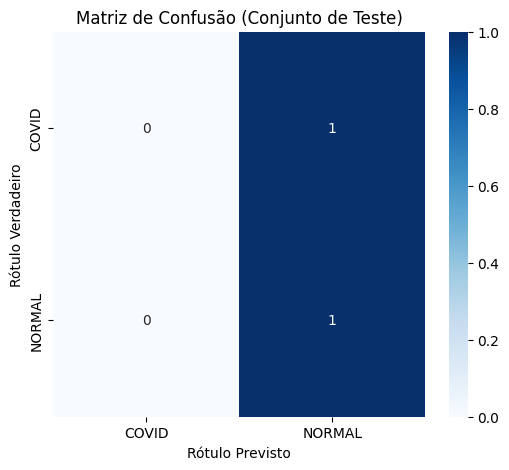

In [36]:
test_steps_per_epoch = test_generator.samples // test_generator.batch_size
if test_generator.samples % test_generator.batch_size != 0:
    test_steps_per_epoch += 1

y_pred_probs = model.predict(test_generator, steps=test_steps_per_epoch)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_generator.classes

acuracia = accuracy_score(y_true, y_pred)
precisao = precision_score(y_true, y_pred, average='macro', zero_division=0)
recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)
cm = confusion_matrix(y_true, y_pred)

print("\n## Relatório Final de Desempenho (ResNet50 + Fine-Tuning)")
print("---")
print(f"Modelo Utilizado: ResNet50 (Pré-treinado em ImageNet)")
print(f"Taxa de Aprendizado: {initial_learning_rate}")
print(f"Épocas de Treinamento: {EPOCHS}")
print("---")

print("### Métricas de Classificação")
print(" | Métrica | Valor |")
print(" | :--- | :--- |")
print(f" | Acurácia | **{acuracia:.4f}** |")
print(f" | Precisão (Macro) | **{precisao:.4f}** |")
print(f" | Recall (Macro) | **{recall:.4f}** |")
print(f" | F1-Score (Macro) | **{f1:.4f}** |")

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=CLASSES, yticklabels=CLASSES)
plt.title('Matriz de Confusão (Conjunto de Teste)')
plt.ylabel('Rótulo Verdadeiro')
plt.xlabel('Rótulo Previsto')
plt.show()